# Machine Learning Methodology: Review

### Review of Review...

----

In [1]:
import seaborn as sns

In [3]:
tips = sns.load_dataset('tips')

---

Choose $X, y$,

In [4]:
features = ['total_bill', 'size']
target = 'tip'

In [5]:
X = tips[features]
y = tips[target]

Choose $\mathcal{Alg}$, 

In [7]:
from sklearn.neighbors import KNeighborsRegressor

Run $\mathcal{Alg}$, produces $\hat{f}$,


In [12]:
model = KNeighborsRegressor().fit(X, y)

Run $\hat{f}$ on some new data,

In [13]:
model.predict(X.sample(3))

array([3.42, 4.18, 3.19])

Score $\hat{f}$ on $(X,y)$, 

In [10]:
model.score(X, y)

0.5679457239089669

## Evaluating the Model  (BETTER)

Is $k = 1$ *really* this good?!

In [14]:
k = 1

KNeighborsRegressor(k).fit(X, y).score(X, y)

0.9896142080482307

...no...

In [26]:
from sklearn.model_selection import train_test_split

Xtr, Xte, ytr, yte = train_test_split(X, y)

We reveal $k = 1$ is terrible! (at predicting data it hasnt seen...),

In [27]:
KNeighborsRegressor(k).fit(Xtr, ytr).score(Xte, yte)

-0.013137576113335658

## Choosing a better model

In [28]:
from sklearn.model_selection import cross_val_score

In [32]:
cross_val_score(KNeighborsRegressor(k), Xtr, ytr).mean()

-0.15178047875949685

In [33]:
scores = [ 
    (cross_val_score(KNeighborsRegressor(k), X, y).mean(), k) for k in range(1, 101)
]

In [35]:
scores[:5]

[(-0.10635534714203265, 1),
 (0.1894834336950311, 2),
 (0.27574577453984617, 3),
 (0.30657023670664224, 4),
 (0.3167983849057186, 5)]

In [37]:
val_score, k_best = max(scores)

In [43]:
k_best

22

In [41]:
%matplotlib inline
import seaborn as sns

<AxesSubplot:>

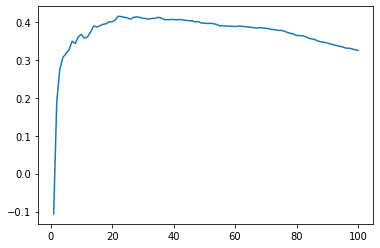

In [42]:
sns.lineplot(
    x=[ k for s, k in scores ],
    y=[ s for s, k in scores ]
)

## Getting the Best Model

The final *performance* (or "score") for the approach we've taken,

In [54]:
KNeighborsRegressor(k_best).fit(Xtr, ytr).score(Xte, yte).round(2)

0.42

## Deployment

In practice we retrain on *all* of the historical data (even though we have no score/performance for this model), 

In [48]:
best_model = KNeighborsRegressor(k_best).fit(X, y)

...but this is likely to just be better as we have more data in $(X, y)$.

In [49]:
best_model.predict(X.sample(3))

array([3.19454545, 3.815     , 3.67136364])

----

We *can* score again on the original dataset, but this is extremely misleading and not to be used for anyhting. But it is an interesting curiosity...

In [51]:
best_model.score(X, y)

0.4359603799407272